# Experiência de polarizadores

Neste exercício, vamos simular a experiência de passar um fotão por vários polarizadores não-alinhados.

Apesar de não termos um laboratório para simular um fotão de cada vez, podemos tentar fazê-lo com um computador quântico.

Começamos por instalar e importar as bibliotecas necessárias.

In [ ]:
%%capture
%pip install qiskit

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler
sampler = StatevectorSampler()

## Experiência dos três polarizadores

Começamos por considerar uma experiência de três polarizadores:
  - Polarizador 1: eixo de polarização horizontal
  - Polarizador 2: eixo de polarização a $45^\circ$ com a horizontal
  - Polarizador 3: eixo de polarização a $90^\circ$ com a horizontal (vertical)

Vamos assumir que $|0\rangle = |H\rangle$ e $|1\rangle = |V\rangle$.

Como a luz chega ao primeiro polarizador sem polarização definida, podemos assumir que o primeiro polarizador está apenas a preparar o estado $|H\rangle$.

Assim, não precisamos de simular o primeiro polarizador.
Vamos assumir que passam um milhão de fotões pelo primeiro.



In [ ]:
# Primeiro polarizador: prepara estado |H>
fotoes1 = 10_000



No entanto, os outros dois polarizadores funcionam como uma medida numa base $\theta$, isto é, correspondem a medir na base
\begin{align}
|H_\theta\rangle &= \phantom{-} \cos\theta \, |H\rangle + \sin\theta \, |V\rangle \\
|V_\theta\rangle &= -\sin\theta \, |H\rangle + \cos\theta \, |V\rangle.
\end{align}

Habitualmente, os computadores quânticos medem na base computacional apenas, o que quer dizer que temos de aplicar uma unitária para poder medir nesta bases.

Então, que unitária devemos escolher? A resposta é simples: é a operação inversa à operação $U$ que prepara os estados $|H_\theta\rangle, |V_\theta\rangle.$

Neste caso, temos
$$
U(\theta)
=
\begin{pmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \phantom{-}\cos\theta
\end{pmatrix}.
$$

Felizmente, esta operação existe já por defeito no Qiskit, sob um outro nome.
De facto, existe a operação
$$
R_y(\theta)
=
\begin{pmatrix}
\cos(\theta/2) & -\sin(\theta/2) \\
\sin(\theta/2) & \phantom{-}\cos(\theta/2),
\end{pmatrix}
$$
pelo que, para medir na base $\theta$, devemos aplicar a operação
$$
U^\dagger(\theta)
=
U(-\theta)
=
R_y(-2\theta).
$$

Assim, quando medirmos $|0\rangle$ no final do circuito, sabemos que estamos na verdade a medir $|H_\theta\rangle$, e, se medirmos $|1\rangle$, estamos na verdade a medir $|V_\theta\rangle$.

Desenhamos então o circuito que corresponde aos fotões a chegar ao segundo polarizador.

In [ ]:
# Segundo polarizador: a 45 graus do primeiro

qc2 = QuantumCircuit(1)
qc2.ry(-2 * np.radians(45), 0)  # Medição a 45 graus
qc2.measure_all()
qc2.draw()

┌──────────┐ ░ ┌─┐
     q: ┤ Ry(-π/2) ├─░─┤M├
        └──────────┘ ░ └╥┘
meas: 1/════════════════╩═
                        0

Vamos simular 10 000 de fotões a passar do primeiro polarizador para o segundo.

Quantos destes passam pelo segundo polarizador?
Temos de correr a simulação

In [ ]:
job = sampler.run([qc2], shots=fotoes1)
result = job.result()[0]
fotoes2 = result.data.meas.get_counts().get('0', 0)

fotoes2

4948

Podemos agora simular o terceiro polarizador, fazendo passar apenas os fotões que sobreviveram ao segundo polarizador.
É assim que simulamos uma medição _destrutiva_.

No entanto, esta situação é diferente do primeiro circuito que escrevemos.

Agora, temos:
  - Um fotão a chegar com polarização linear no ângulo $\theta$ com a horizontal
  - Um polarizador num ângulo $\theta'$ com a horizontal.

Isto quer dizer que agora temos primeiro de preparar o estado certo, e só depois é que medimos na base que queremos (que será agora a $\theta' = 90^\circ$!).

In [ ]:
# Terceiro polarizador: a 90 graus do primeiro

qc3 = QuantumCircuit(1)
qc3.ry(2 * np.radians(45), 0)  # Preparar o fotão a 45 graus
qc3.ry(-2 * np.radians(90), 0)  # Medir na base a 90 graus
qc3.measure_all()
qc3.draw()

┌─────────┐┌────────┐ ░ ┌─┐
     q: ┤ Ry(π/2) ├┤ Ry(-π) ├─░─┤M├
        └─────────┘└────────┘ ░ └╥┘
meas: 1/═════════════════════════╩═
                                 0

In [ ]:
job = sampler.run([qc3], shots=fotoes2)
result = job.result()[0]
fotoes3 = result.data.meas.get_counts().get('0', 0)

fotoes3

2459

Isto quer dizer que esperamos que apenas aproximadamente 25\% dos fotões passam intactos do primeiro para o último polarizador.


## (1) Dois polarizadores

Neste problema, simulamos a situação em que um fotão horizontal passa por um polarizador vertical. Simulamos outra vez 1000000 de fotões.

1.a) Criação do circuito

1.b) Simulação

1.c) Comentário

## (2) Quatro polarizadores

Vamos agora repetir a análise, mas tendo quatro polarizadores, a $30^\circ$ graus entre si.


2.a) Criar e simular os circuitos

2.b) Comentário

## (3) Caso geral de $n+1$ polarizadores (opcional)

3.a) Criar uma função em que um fotão é preparado com polarização linear $\theta$ e depois é medido por um polarizador num ângulo $\theta'$ com a horizontal.

In [ ]:
def qc_polarizador(theta, theta_):
  pass

3.b) Criar uma função para uma experiência de $n+1$ polarizadores.

(Lembre-se que apenas precisa de $n$ circuitos, pois o primeiro polarizador não é simulado.)

In [ ]:
def experiencia_polarizadores(n, nfotoes):
  pass

3.c) Simular os casos $n=1,2,\ldots, 10$

3.d) Gráfico de resultados

In [ ]:
# Mudar as listas xdata, ydata com a informação correta
xdata = []
ydata = []

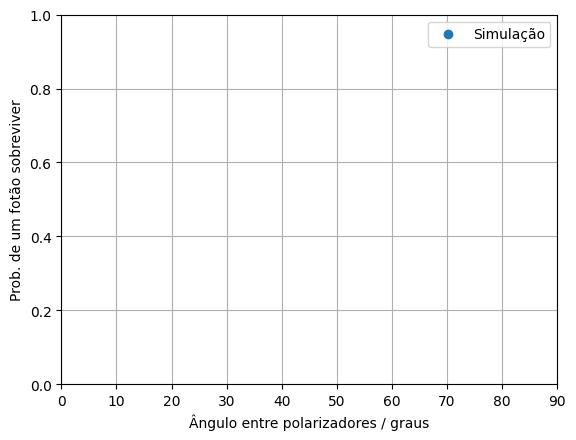

In [ ]:
fig, ax = plt.subplots()

# Plot das simulações
plt.scatter(xdata, ydata, label='Simulação')

ax.set_xlim([0, 90])
ax.set_ylim([0, 1])
ax.set_xlabel('Ângulo entre polarizadores / graus')
ax.set_ylabel('Prob. de um fotão sobreviver')
ax.legend()
ax.grid()